In [5]:
import importlib
from Utils import Preprocessing
from Models import ConvAutoencoder,  DenseRegAutoencoder, DenseAutoencoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
importlib.reload(Preprocessing)
importlib.reload(DenseRegAutoencoder)
importlib.reload(ConvAutoencoder)
importlib.reload(DenseAutoencoder)

<module 'Models.DenseAutoencoder' from '/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/Models/DenseAutoencoder.py'>

In [3]:
def display(array1, array2, labels):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(208, 176))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(208, 176))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title(labels[i], fontsize=10)

    plt.show()

In [8]:
X_train = np.load('PCA_Data/X_train_pca_wh.npy')
y_train = np.load('PCA_Data/y_train.npy')
labels_list_train = np.load('PCA_Data/labels_list_train.npy')

X_test = np.load('PCA_Data/X_test_pca_wh.npy')
y_test = np.load('PCA_Data/y_test.npy')
labels_list_test = np.load('PCA_Data/labels_list_test.npy')

In [9]:
np.unique(y_train, return_counts=True)

(array([0.        , 0.00888585, 0.05329445, 1.        ]),
 array([2560, 1792,  717,   52]))

In [10]:
np.unique(y_test, return_counts=True)

(array([0.        , 0.00888585, 0.05329445, 1.        ]),
 array([640, 448, 179,  12]))

In [11]:
X_train.shape

(5121, 41, 87)

In [12]:
validation_percentage = 0.25
X_val = X_train[int(1-validation_percentage * len(X_train)):]
X_train = X_train[:int(1-validation_percentage * len(X_train))]
y_val = y_train[int(1-validation_percentage * len(y_train)):]
y_train = y_train[:int(1-validation_percentage * len(y_train))]
labels_list_val = labels_list_train[int(1-validation_percentage * len(labels_list_train)):]
labels_list_train = labels_list_train[:int(1-validation_percentage * len(labels_list_train))]

In [13]:
img_height=41
img_width=87

In [17]:
importlib.reload(DenseRegAutoencoder)
autoencoder, encoder = DenseRegAutoencoder.build_Model(img_height, img_width)
autoencoder.summary()

In [19]:
hystory = autoencoder.fit(
    x={"input": X_train},
    y={"output_autoencoder": X_train, "output_class_regression": y_train},
    epochs=20,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(X_val, {"output_autoencoder": X_val, "output_class_regression": y_val}),
)

Epoch 1/20
61/61 [==============================] - 8s 115ms/step - loss: 17.0645 - output_autoencoder_loss: 0.0249 - output_class_regression_loss: 0.0510 - val_loss: 7.0033 - val_output_autoencoder_loss: 0.0106 - val_output_class_regression_loss: 0.0098
Epoch 2/20
61/61 [==============================] - 7s 109ms/step - loss: 2.4951 - output_autoencoder_loss: 0.0081 - output_class_regression_loss: 0.0146 - val_loss: 0.2988 - val_output_autoencoder_loss: 0.0107 - val_output_class_regression_loss: 0.0346
Epoch 3/20
61/61 [==============================] - 7s 111ms/step - loss: 0.1341 - output_autoencoder_loss: 0.0081 - output_class_regression_loss: 0.0159 - val_loss: 0.0808 - val_output_autoencoder_loss: 0.0107 - val_output_class_regression_loss: 0.0120
Epoch 4/20
61/61 [==============================] - 7s 112ms/step - loss: 0.0723 - output_autoencoder_loss: 0.0082 - output_class_regression_loss: 0.0113 - val_loss: 0.0687 - val_output_autoencoder_loss: 0.0110 - val_output_class_regress

<Axes: title={'center': 'Autoencoder loss'}>

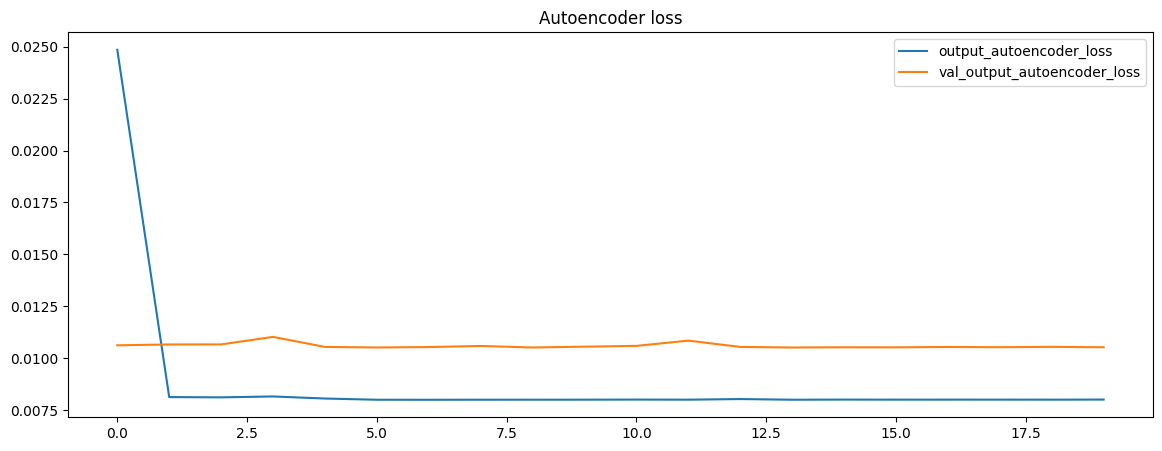

In [21]:
df_hystory = pd.DataFrame(hystory.history)
#df_hystory.plot(figsize=(14, 5), title='Autoencoder loss')
df_hystory[['output_autoencoder_loss', 'val_output_autoencoder_loss']].plot(figsize=(14, 5), title='Autoencoder loss')

<Axes: title={'center': 'Regression loss'}>

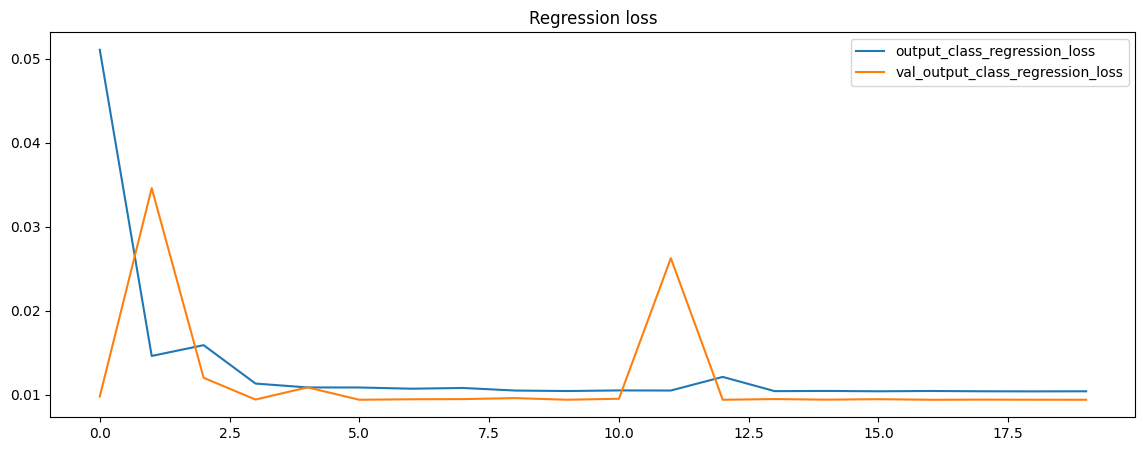

In [22]:
df_hystory[['output_class_regression_loss', 'val_output_class_regression_loss']].plot(figsize=(14, 5), title='Regression loss')

In [18]:
predictions = autoencoder.predict(X_val)
#predictions

8/8 [==============================] - 0s 17ms/step


In [19]:
np.unique(predictions[1], return_counts=True)

(array([-0.00304889, -0.0022853 , -0.00228392, ...,  0.84928733,
         0.8495506 ,  0.8508673 ], dtype=float32),
 array([1, 1, 1, ..., 1, 1, 1]))

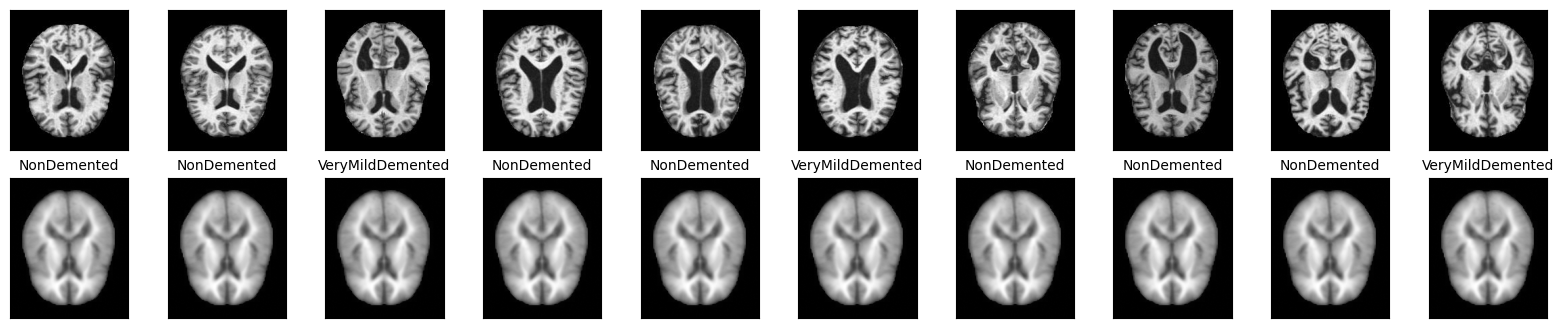

In [20]:
display(X_val, predictions, labels = labels_list_val)#[0]

In [21]:
#autoencoder = ConvAutoencoder.buid_Model(img_height=208, img_width=176)